In [19]:
!pip install torchinfo tqdm torch

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 56.7 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 71.0 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 62.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 25.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 60.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 68.5 MB

In [24]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [25]:
df = pd.read_csv('data/etf/jan2025/cleaned/gdx_cleaned_jan2025.csv', sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [26]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [27]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,GDX,2025-01-03 09:40:00.022433731-05:00,0.000569,0.02,35.170,35.16,2600.0,35.18,700.0,35.15,...,35.05,100.0,35.27,200.0,0.040,0.005,0.030,2,0,2
1,GDX,2025-01-03 09:40:00.062912518-05:00,0.000284,0.01,35.175,35.17,500.0,35.18,200.0,35.16,...,35.07,100.0,35.27,200.0,0.030,0.010,0.030,2,2,2
2,GDX,2025-01-03 09:40:00.082894593-05:00,0.000569,0.02,35.170,35.16,2600.0,35.18,100.0,35.15,...,35.05,100.0,35.27,200.0,0.040,0.015,0.030,2,2,2
3,GDX,2025-01-03 09:40:00.143438724-05:00,0.000284,0.01,35.175,35.17,400.0,35.18,100.0,35.16,...,35.07,100.0,35.27,200.0,0.030,0.000,0.030,2,0,2
4,GDX,2025-01-03 09:40:00.398413129-05:00,0.000284,0.01,35.185,35.18,610.0,35.19,2400.0,35.17,...,35.09,100.0,35.29,100.0,0.025,0.000,0.015,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,GDX,2025-01-31 15:45:07.157841147-05:00,0.000257,0.01,38.925,38.92,600.0,38.93,800.0,38.91,...,38.83,100.0,39.02,200.0,0.025,0.065,0.105,2,2,2
338957,GDX,2025-01-31 15:45:07.237508298-05:00,0.000514,0.02,38.930,38.92,1100.0,38.94,200.0,38.91,...,38.83,100.0,39.03,100.0,0.015,0.055,0.095,2,2,2
338958,GDX,2025-01-31 15:45:09.202809809-05:00,0.000257,0.01,38.935,38.93,400.0,38.94,200.0,38.92,...,38.84,200.0,39.03,100.0,0.015,0.055,0.095,2,2,2
338959,GDX,2025-01-31 15:45:09.328257655-05:00,0.000514,0.02,38.940,38.93,1500.0,38.95,800.0,38.92,...,38.84,200.0,39.05,100.0,0.005,0.045,0.085,0,2,2


In [6]:
theta=0.001
df["Target_10"] = np.where(df["Raw_Target_10"] > theta, 2, np.where(df["Raw_Target_10"] < -theta, 1,0))
df["Target_50"] = np.where(df["Raw_Target_50"] > theta, 2, np.where(df["Raw_Target_50"] < -theta, 1,0))
df["Target_100"] = np.where(df["Raw_Target_100"] > theta, 2, np.where(df["Raw_Target_100"] < -theta, 1,0))

In [28]:
# Convert Series to DataFrame
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)

print(class_summary)

   Target_100   Count  Percent
0           0   88878    26.22
1           1  124083    36.61
2           2  126000    37.17


In [29]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [30]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,GDX,2025-01-03 09:40:00.022433731-05:00,0.000569,0.02,35.170,-1.264777,1.746274,-1.261676,-0.180226,-1.264516,...,-1.260276,-0.289312,-1.270929,0.167599,0.040,0.005,0.030,2,0,2
1,GDX,2025-01-03 09:40:00.062912518-05:00,0.000284,0.01,35.175,-1.257408,-0.343107,-1.261676,-0.664708,-1.257147,...,-1.245583,-0.289312,-1.270929,0.167599,0.030,0.010,0.030,2,2,2
2,GDX,2025-01-03 09:40:00.082894593-05:00,0.000569,0.02,35.170,-1.264777,1.746274,-1.261676,-0.761605,-1.264516,...,-1.260276,-0.289312,-1.270929,0.167599,0.040,0.015,0.030,2,2,2
3,GDX,2025-01-03 09:40:00.143438724-05:00,0.000284,0.01,35.175,-1.257408,-0.442601,-1.261676,-0.761605,-1.257147,...,-1.245583,-0.289312,-1.270929,0.167599,0.030,0.000,0.030,2,0,2
4,GDX,2025-01-03 09:40:00.398413129-05:00,0.000284,0.01,35.185,-1.250038,-0.233663,-1.254305,1.467017,-1.249777,...,-1.230891,-0.289312,-1.256227,-0.291127,0.025,0.000,0.015,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,GDX,2025-01-31 15:45:07.157841147-05:00,0.000257,0.01,38.925,1.506150,-0.243613,1.502647,-0.083329,1.506328,...,1.516640,-0.289312,1.485680,0.167599,0.025,0.065,0.105,2,2,2
338957,GDX,2025-01-31 15:45:07.237508298-05:00,0.000514,0.02,38.930,1.506150,0.253859,1.510019,-0.664708,1.506328,...,1.516640,-0.289312,1.493031,-0.291127,0.015,0.055,0.095,2,2,2
338958,GDX,2025-01-31 15:45:09.202809809-05:00,0.000257,0.01,38.935,1.513520,-0.442601,1.510019,-0.664708,1.513697,...,1.523986,0.146142,1.493031,-0.291127,0.015,0.055,0.095,2,2,2
338959,GDX,2025-01-31 15:45:09.328257655-05:00,0.000514,0.02,38.940,1.513520,0.651837,1.517390,-0.083329,1.513697,...,1.523986,0.146142,1.507733,-0.291127,0.005,0.045,0.085,0,2,2


In [31]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [32]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,-1.264777,-1.264516,-1.264174,-1.263766,-1.263165,-1.262265,-1.260876,-1.258503,-1.261411,-1.260276,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,0,2
1,-1.257408,-1.257147,-1.256805,-1.256397,-1.255797,-1.254897,-1.253509,-1.251139,-1.246699,-1.245583,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,2,2
2,-1.264777,-1.264516,-1.264174,-1.263766,-1.263165,-1.262265,-1.260876,-1.258503,-1.261411,-1.260276,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,2,2
3,-1.257408,-1.257147,-1.256805,-1.256397,-1.255797,-1.254897,-1.253509,-1.251139,-1.246699,-1.245583,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,0,2
4,-1.250038,-1.249777,-1.249436,-1.249028,-1.248428,-1.247529,-1.246142,-1.243776,-1.239343,-1.230891,...,0.700116,1.735179,-0.625941,1.598717,-0.422550,-0.078338,-0.291127,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,1.506150,1.506328,1.506520,1.506909,1.507444,1.508174,1.509103,1.510206,1.511725,1.516640,...,-0.322478,1.193974,-0.388171,0.333686,-0.422550,-0.346646,0.167599,2,2,2
338957,1.506150,1.506328,1.506520,1.506909,1.507444,1.508174,1.509103,1.510206,1.511725,1.516640,...,1.381845,-0.537882,-0.010117,-0.552696,-0.422550,-0.078338,-0.291127,2,2,2
338958,1.513520,1.513697,1.513889,1.514278,1.514812,1.515543,1.516470,1.517569,1.519081,1.523986,...,1.381845,-0.537882,-0.010117,-0.552696,-0.422550,-0.078338,-0.291127,2,2,2
338959,1.513520,1.513697,1.513889,1.514278,1.514812,1.515543,1.516470,1.517569,1.519081,1.523986,...,-0.436100,-0.193675,-0.744825,-0.552696,-0.237906,-0.346646,-0.291127,0,2,2


In [33]:
def prepare_x(data):
    df1 = data[:, :40]
    return np.array(df1)

def get_label(data):
    lob = data[:, -3:]
    return lob

def data_classification(X, Y, T):
    [N, D] = X.shape
    df = np.array(X)

    dY = np.array(Y)

    dataY = dY[T - 1:N]

    dataX = np.zeros((N - T + 1, T, D))
    for i in range(T, N + 1):
        dataX[i - T] = df[i - T:i, :]

    return dataX, dataY

def torch_data(x, y):
    x = torch.from_numpy(x)
    x = torch.unsqueeze(x, 1)
    y = torch.from_numpy(y)
    y = F.one_hot(y, num_classes=3)
    return x, y

In [34]:
class Dataset(data.Dataset):
    """Characterizes a dataset for PyTorch"""
    def __init__(self, data, k, num_classes, T):
        """Initialization"""
        self.k = k
        self.num_classes = num_classes
        self.T = T

        x = prepare_x(data)
        y = get_label(data)
        x, y = data_classification(x, y, self.T)
        y = y[:,self.k]
        self.length = len(x)

        x = torch.from_numpy(x)
        self.x = torch.unsqueeze(x, 1)
        self.y = torch.from_numpy(y)

    def __len__(self):
        """Denotes the total number of samples"""
        return self.length

    def __getitem__(self, index):
        """Generates samples of data"""
        return self.x[index], self.y[index]

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [36]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03    11408
2025-01-06    18970
2025-01-07    19495
2025-01-08    19059
2025-01-10    25027
2025-01-13    21295
2025-01-14    16302
2025-01-15    17897
2025-01-16    17470
2025-01-17    16188
2025-01-21    15772
2025-01-22    13444
2025-01-23    14130
2025-01-24    11897
2025-01-27    19327
2025-01-28    11643
2025-01-29    24406
2025-01-30    20731
2025-01-31    24500
dtype: int64

In [37]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 17))]
df_val = df[(df["Date"] >= date(2025, 1, 21)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [38]:
df_train = df_train[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]

In [39]:
batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([183012, 1, 100, 40]) torch.Size([183012])


In [40]:
class deeplob(nn.Module):
    def __init__(self, y_len):
        super().__init__()
        self.y_len = y_len

        # convolution blocks
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.LeakyReLU(negative_slope=0.01),
#             nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )

        # inception moduels
        self.inp1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp3 = nn.Sequential(
            nn.MaxPool2d((3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )

        # lstm layers
        self.lstm = nn.LSTM(input_size=192, hidden_size=64, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(64, self.y_len)

    def forward(self, x):
        # h0: (number of hidden layers, batch size, hidden size)
        h0 = torch.zeros(1, x.size(0), 64).to(device)
        c0 = torch.zeros(1, x.size(0), 64).to(device)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x_inp1 = self.inp1(x)
        x_inp2 = self.inp2(x)
        x_inp3 = self.inp3(x)

        x = torch.cat((x_inp1, x_inp2, x_inp3), dim=1)

#         x = torch.transpose(x, 1, 2)
        x = x.permute(0, 2, 1, 3)
        x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))

        x, _ = self.lstm(x, (h0, c0))
        x = x[:, -1, :]
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)

        return forecast_y

In [41]:
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)

deeplob(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [43]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    best_test_loss = np.inf
    best_test_epoch = 0

    for it in tqdm(range(epochs)):

        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            # print("inputs.shape:", inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)
            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        if test_loss < best_test_loss:
            torch.save(model.state_dict(), './best_val_model_pytorch.pt')
            best_test_loss = test_loss
            best_test_epoch = it
            print('model saved')

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Validation Loss: {test_loss:.4f}, Duration: {dt}, Best Val Epoch: {best_test_epoch}')

    return train_losses, test_losses

In [44]:
train_losses, val_losses = batch_gd(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:32<26:27, 32.39s/it]

model saved
Epoch 1/50, Train Loss: 1.0591,           Validation Loss: 1.0199, Duration: 0:00:32.394238, Best Val Epoch: 0


  4%|▍         | 2/50 [01:04<25:52, 32.34s/it]

model saved
Epoch 2/50, Train Loss: 0.9921,           Validation Loss: 0.9371, Duration: 0:00:32.305022, Best Val Epoch: 1


  6%|▌         | 3/50 [01:31<23:11, 29.62s/it]

model saved
Epoch 3/50, Train Loss: 0.9409,           Validation Loss: 0.9306, Duration: 0:00:26.371670, Best Val Epoch: 2


  8%|▊         | 4/50 [02:00<22:34, 29.45s/it]

model saved
Epoch 4/50, Train Loss: 0.8924,           Validation Loss: 0.8549, Duration: 0:00:29.192703, Best Val Epoch: 3


 10%|█         | 5/50 [02:28<21:37, 28.84s/it]

model saved
Epoch 5/50, Train Loss: 0.8577,           Validation Loss: 0.8238, Duration: 0:00:27.745577, Best Val Epoch: 4


 12%|█▏        | 6/50 [02:59<21:42, 29.60s/it]

model saved
Epoch 6/50, Train Loss: 0.8294,           Validation Loss: 0.8032, Duration: 0:00:31.083656, Best Val Epoch: 5


 14%|█▍        | 7/50 [03:30<21:38, 30.20s/it]

Epoch 7/50, Train Loss: 0.8154,           Validation Loss: 0.8092, Duration: 0:00:31.424820, Best Val Epoch: 5


 16%|█▌        | 8/50 [03:56<20:13, 28.89s/it]

model saved
Epoch 8/50, Train Loss: 0.8020,           Validation Loss: 0.7795, Duration: 0:00:26.085442, Best Val Epoch: 7


 18%|█▊        | 9/50 [04:24<19:34, 28.64s/it]

model saved
Epoch 9/50, Train Loss: 0.7884,           Validation Loss: 0.7620, Duration: 0:00:28.079407, Best Val Epoch: 8


 20%|██        | 10/50 [04:49<18:17, 27.45s/it]

model saved
Epoch 10/50, Train Loss: 0.7941,           Validation Loss: 0.7568, Duration: 0:00:24.783209, Best Val Epoch: 9


 22%|██▏       | 11/50 [05:19<18:23, 28.29s/it]

Epoch 11/50, Train Loss: 0.7801,           Validation Loss: 0.7589, Duration: 0:00:30.200368, Best Val Epoch: 9


 24%|██▍       | 12/50 [05:50<18:26, 29.11s/it]

model saved
Epoch 12/50, Train Loss: 0.7715,           Validation Loss: 0.7507, Duration: 0:00:30.988832, Best Val Epoch: 11


 26%|██▌       | 13/50 [06:17<17:33, 28.49s/it]

Epoch 13/50, Train Loss: 0.7713,           Validation Loss: 0.7543, Duration: 0:00:27.046033, Best Val Epoch: 11


 28%|██▊       | 14/50 [06:40<16:07, 26.87s/it]

model saved
Epoch 14/50, Train Loss: 0.7628,           Validation Loss: 0.7428, Duration: 0:00:23.128711, Best Val Epoch: 13


 30%|███       | 15/50 [07:11<16:25, 28.15s/it]

model saved
Epoch 15/50, Train Loss: 0.7586,           Validation Loss: 0.7367, Duration: 0:00:31.111141, Best Val Epoch: 14


 32%|███▏      | 16/50 [07:39<15:52, 28.01s/it]

model saved
Epoch 16/50, Train Loss: 0.7528,           Validation Loss: 0.7342, Duration: 0:00:27.698845, Best Val Epoch: 15


 34%|███▍      | 17/50 [08:10<15:56, 28.98s/it]

Epoch 17/50, Train Loss: 0.7469,           Validation Loss: 0.7427, Duration: 0:00:31.243245, Best Val Epoch: 15


 36%|███▌      | 18/50 [08:40<15:29, 29.04s/it]

model saved
Epoch 18/50, Train Loss: 0.7438,           Validation Loss: 0.7279, Duration: 0:00:29.160730, Best Val Epoch: 17


 38%|███▊      | 19/50 [09:04<14:21, 27.78s/it]

Epoch 19/50, Train Loss: 0.7428,           Validation Loss: 0.7672, Duration: 0:00:24.840613, Best Val Epoch: 17


 40%|████      | 20/50 [09:34<14:10, 28.35s/it]

model saved
Epoch 20/50, Train Loss: 0.7366,           Validation Loss: 0.7253, Duration: 0:00:29.673717, Best Val Epoch: 19


 42%|████▏     | 21/50 [10:06<14:08, 29.27s/it]

model saved
Epoch 21/50, Train Loss: 0.7367,           Validation Loss: 0.7187, Duration: 0:00:31.433010, Best Val Epoch: 20


 44%|████▍     | 22/50 [10:37<13:58, 29.95s/it]

Epoch 22/50, Train Loss: 0.7300,           Validation Loss: 0.7188, Duration: 0:00:31.516770, Best Val Epoch: 20


 46%|████▌     | 23/50 [11:07<13:26, 29.88s/it]

model saved
Epoch 23/50, Train Loss: 0.7324,           Validation Loss: 0.7142, Duration: 0:00:29.727069, Best Val Epoch: 22


 48%|████▊     | 24/50 [11:37<13:02, 30.08s/it]

model saved
Epoch 24/50, Train Loss: 0.7254,           Validation Loss: 0.7120, Duration: 0:00:30.549605, Best Val Epoch: 23


 50%|█████     | 25/50 [12:06<12:19, 29.59s/it]

model saved
Epoch 25/50, Train Loss: 0.7233,           Validation Loss: 0.7117, Duration: 0:00:28.437626, Best Val Epoch: 24


 52%|█████▏    | 26/50 [12:33<11:35, 28.99s/it]

model saved
Epoch 26/50, Train Loss: 0.7232,           Validation Loss: 0.7062, Duration: 0:00:27.596538, Best Val Epoch: 25


 54%|█████▍    | 27/50 [13:04<11:20, 29.60s/it]

model saved
Epoch 27/50, Train Loss: 0.7262,           Validation Loss: 0.7046, Duration: 0:00:31.031331, Best Val Epoch: 26


 56%|█████▌    | 28/50 [13:33<10:46, 29.37s/it]

Epoch 28/50, Train Loss: 0.7152,           Validation Loss: 0.7060, Duration: 0:00:28.817443, Best Val Epoch: 26


 58%|█████▊    | 29/50 [14:05<10:29, 29.98s/it]

model saved
Epoch 29/50, Train Loss: 0.7173,           Validation Loss: 0.6984, Duration: 0:00:31.412950, Best Val Epoch: 28


 60%|██████    | 30/50 [14:34<09:55, 29.80s/it]

Epoch 30/50, Train Loss: 0.7150,           Validation Loss: 0.7081, Duration: 0:00:29.362524, Best Val Epoch: 28


 62%|██████▏   | 31/50 [15:03<09:23, 29.64s/it]

Epoch 31/50, Train Loss: 0.7134,           Validation Loss: 0.7055, Duration: 0:00:29.280903, Best Val Epoch: 28


 64%|██████▍   | 32/50 [15:29<08:34, 28.61s/it]

Epoch 32/50, Train Loss: 0.7120,           Validation Loss: 0.6997, Duration: 0:00:26.188747, Best Val Epoch: 28


 66%|██████▌   | 33/50 [16:02<08:25, 29.74s/it]

Epoch 33/50, Train Loss: 0.7123,           Validation Loss: 0.7162, Duration: 0:00:32.386041, Best Val Epoch: 28


 68%|██████▊   | 34/50 [16:33<08:00, 30.05s/it]

Epoch 34/50, Train Loss: 0.7090,           Validation Loss: 0.7216, Duration: 0:00:30.758104, Best Val Epoch: 28


 70%|███████   | 35/50 [17:05<07:41, 30.76s/it]

Epoch 35/50, Train Loss: 0.7075,           Validation Loss: 0.6992, Duration: 0:00:32.430412, Best Val Epoch: 28


 72%|███████▏  | 36/50 [17:34<07:02, 30.18s/it]

Epoch 36/50, Train Loss: 0.7055,           Validation Loss: 0.6985, Duration: 0:00:28.821130, Best Val Epoch: 28


 74%|███████▍  | 37/50 [18:05<06:35, 30.41s/it]

Epoch 37/50, Train Loss: 0.7169,           Validation Loss: 0.7144, Duration: 0:00:30.961709, Best Val Epoch: 28


 76%|███████▌  | 38/50 [18:30<05:47, 28.95s/it]

model saved
Epoch 38/50, Train Loss: 0.7046,           Validation Loss: 0.6899, Duration: 0:00:25.547111, Best Val Epoch: 37


 78%|███████▊  | 39/50 [18:57<05:10, 28.26s/it]

Epoch 39/50, Train Loss: 0.7025,           Validation Loss: 0.6972, Duration: 0:00:26.631686, Best Val Epoch: 37


 80%|████████  | 40/50 [19:28<04:49, 28.97s/it]

Epoch 40/50, Train Loss: 0.7020,           Validation Loss: 0.6962, Duration: 0:00:30.616588, Best Val Epoch: 37


 82%|████████▏ | 41/50 [19:59<04:27, 29.75s/it]

Epoch 41/50, Train Loss: 0.7068,           Validation Loss: 0.6936, Duration: 0:00:31.588774, Best Val Epoch: 37


 84%|████████▍ | 42/50 [20:25<03:49, 28.68s/it]

Epoch 42/50, Train Loss: 0.7009,           Validation Loss: 0.6923, Duration: 0:00:26.166247, Best Val Epoch: 37


 86%|████████▌ | 43/50 [20:51<03:13, 27.71s/it]

Epoch 43/50, Train Loss: 0.7031,           Validation Loss: 0.7089, Duration: 0:00:25.466192, Best Val Epoch: 37


 88%|████████▊ | 44/50 [21:21<02:51, 28.53s/it]

model saved
Epoch 44/50, Train Loss: 0.7041,           Validation Loss: 0.6874, Duration: 0:00:30.440986, Best Val Epoch: 43


 90%|█████████ | 45/50 [21:47<02:18, 27.77s/it]

model saved
Epoch 45/50, Train Loss: 0.6949,           Validation Loss: 0.6873, Duration: 0:00:25.976630, Best Val Epoch: 44


 92%|█████████▏| 46/50 [22:12<01:47, 26.85s/it]

Epoch 46/50, Train Loss: 0.6989,           Validation Loss: 0.6884, Duration: 0:00:24.727939, Best Val Epoch: 44


 94%|█████████▍| 47/50 [22:43<01:24, 28.07s/it]

Epoch 47/50, Train Loss: 0.6982,           Validation Loss: 0.7051, Duration: 0:00:30.903936, Best Val Epoch: 44


 96%|█████████▌| 48/50 [23:09<00:54, 27.40s/it]

model saved
Epoch 48/50, Train Loss: 0.6981,           Validation Loss: 0.6857, Duration: 0:00:25.844346, Best Val Epoch: 47


 98%|█████████▊| 49/50 [23:39<00:28, 28.42s/it]

model saved
Epoch 49/50, Train Loss: 0.6940,           Validation Loss: 0.6848, Duration: 0:00:30.787364, Best Val Epoch: 48


100%|██████████| 50/50 [24:11<00:00, 29.04s/it]

model saved
Epoch 50/50, Train Loss: 0.6936,           Validation Loss: 0.6823, Duration: 0:00:31.939323, Best Val Epoch: 49


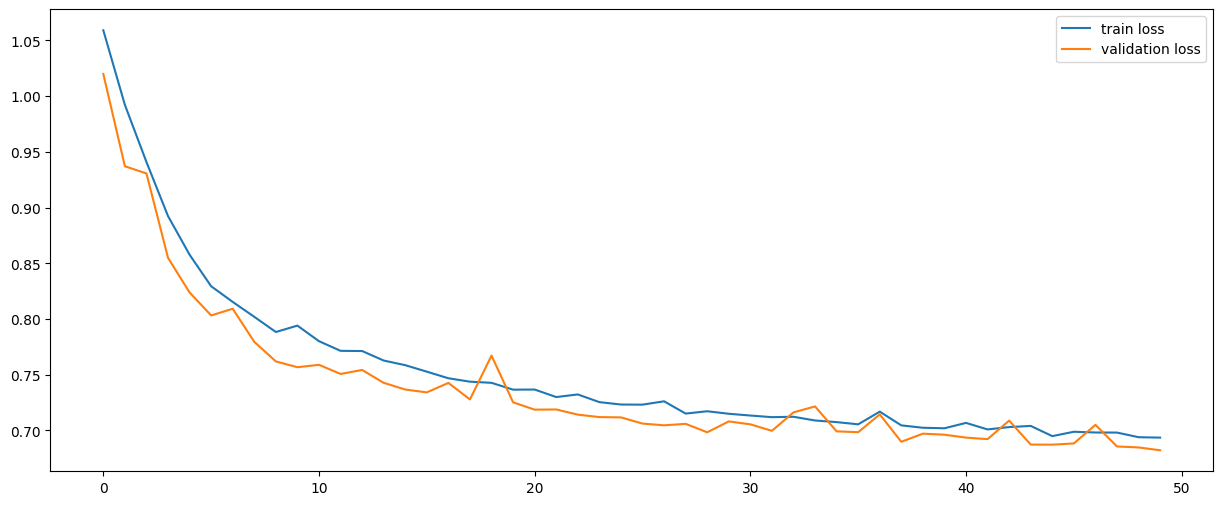

In [59]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [65]:
state = torch.load('./best_val_model_pytorch.pt')
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.5283


In [61]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [62]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.31042773151487335
              precision    recall  f1-score   support

           0     0.2676    0.5512    0.3603     49350
           1     0.3629    0.2657    0.3068     66422
           2     0.3655    0.1779    0.2393     67240

    accuracy                         0.3104    183012
   macro avg     0.3320    0.3316    0.3021    183012
weighted avg     0.3382    0.3104    0.2964    183012



In [49]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100   Count  Percent
0           0   88878    26.22
1           1  124083    36.61
2           2  126000    37.17


In [50]:
from models.mlp import MLP

mlp_model = MLP()
mlp_model.to(device)

MLP(
  (linear1): Linear(in_features=4000, out_features=128, bias=True)
  (leakyReLU): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=128, out_features=3, bias=True)
)

In [51]:
mlp_train_losses, mlp_val_losses = batch_gd(mlp_model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:07<05:53,  7.22s/it]

model saved
Epoch 1/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.220370, Best Val Epoch: 0


  4%|▍         | 2/50 [00:14<05:41,  7.12s/it]

Epoch 2/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.054410, Best Val Epoch: 0


  6%|▌         | 3/50 [00:21<05:35,  7.14s/it]

Epoch 3/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.168356, Best Val Epoch: 0


  8%|▊         | 4/50 [00:28<05:26,  7.11s/it]

Epoch 4/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.047861, Best Val Epoch: 0


 10%|█         | 5/50 [00:35<05:19,  7.09s/it]

Epoch 5/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.071785, Best Val Epoch: 0


 12%|█▏        | 6/50 [00:42<05:13,  7.13s/it]

Epoch 6/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.190351, Best Val Epoch: 0


 14%|█▍        | 7/50 [00:49<05:07,  7.14s/it]

Epoch 7/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.168216, Best Val Epoch: 0


 16%|█▌        | 8/50 [00:56<04:57,  7.08s/it]

Epoch 8/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:06.954417, Best Val Epoch: 0


 18%|█▊        | 9/50 [01:03<04:50,  7.09s/it]

Epoch 9/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.117260, Best Val Epoch: 0


 20%|██        | 10/50 [01:11<04:44,  7.11s/it]

Epoch 10/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.155292, Best Val Epoch: 0


 22%|██▏       | 11/50 [01:18<04:37,  7.11s/it]

Epoch 11/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.119738, Best Val Epoch: 0


 24%|██▍       | 12/50 [01:25<04:30,  7.13s/it]

Epoch 12/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.153439, Best Val Epoch: 0


 26%|██▌       | 13/50 [01:32<04:23,  7.12s/it]

Epoch 13/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.103182, Best Val Epoch: 0


 28%|██▊       | 14/50 [01:39<04:14,  7.08s/it]

Epoch 14/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:06.980795, Best Val Epoch: 0


 30%|███       | 15/50 [01:46<04:08,  7.10s/it]

Epoch 15/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.153181, Best Val Epoch: 0


 32%|███▏      | 16/50 [01:52<03:47,  6.70s/it]

Epoch 16/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:05.761547, Best Val Epoch: 0


 34%|███▍      | 17/50 [01:59<03:44,  6.80s/it]

Epoch 17/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.031963, Best Val Epoch: 0


 36%|███▌      | 18/50 [02:04<03:21,  6.31s/it]

Epoch 18/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:05.179172, Best Val Epoch: 0


 38%|███▊      | 19/50 [02:11<03:23,  6.57s/it]

Epoch 19/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.163844, Best Val Epoch: 0


 40%|████      | 20/50 [02:18<03:21,  6.71s/it]

Epoch 20/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.029873, Best Val Epoch: 0


 42%|████▏     | 21/50 [02:26<03:18,  6.85s/it]

Epoch 21/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.189950, Best Val Epoch: 0


 44%|████▍     | 22/50 [02:33<03:15,  6.99s/it]

Epoch 22/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.299878, Best Val Epoch: 0


 46%|████▌     | 23/50 [02:40<03:09,  7.03s/it]

Epoch 23/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.131845, Best Val Epoch: 0


 48%|████▊     | 24/50 [02:47<03:02,  7.03s/it]

Epoch 24/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.035871, Best Val Epoch: 0


 50%|█████     | 25/50 [02:54<02:57,  7.11s/it]

Epoch 25/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.275352, Best Val Epoch: 0


 52%|█████▏    | 26/50 [03:01<02:50,  7.12s/it]

Epoch 26/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.163664, Best Val Epoch: 0


 54%|█████▍    | 27/50 [03:09<02:45,  7.18s/it]

Epoch 27/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.312131, Best Val Epoch: 0


 56%|█████▌    | 28/50 [03:16<02:37,  7.14s/it]

Epoch 28/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.051771, Best Val Epoch: 0


 58%|█████▊    | 29/50 [03:23<02:30,  7.17s/it]

Epoch 29/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.230970, Best Val Epoch: 0


 60%|██████    | 30/50 [03:31<02:28,  7.44s/it]

Epoch 30/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:08.077545, Best Val Epoch: 0


 62%|██████▏   | 31/50 [03:38<02:16,  7.17s/it]

Epoch 31/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:06.531882, Best Val Epoch: 0


 64%|██████▍   | 32/50 [03:43<02:01,  6.76s/it]

Epoch 32/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:05.798608, Best Val Epoch: 0


 66%|██████▌   | 33/50 [03:49<01:49,  6.46s/it]

Epoch 33/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:05.775348, Best Val Epoch: 0


 68%|██████▊   | 34/50 [03:56<01:45,  6.60s/it]

Epoch 34/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:06.927264, Best Val Epoch: 0


 70%|███████   | 35/50 [04:03<01:41,  6.75s/it]

Epoch 35/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.079456, Best Val Epoch: 0


 72%|███████▏  | 36/50 [04:09<01:29,  6.40s/it]

Epoch 36/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:05.597734, Best Val Epoch: 0


 74%|███████▍  | 37/50 [04:15<01:23,  6.44s/it]

Epoch 37/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:06.536607, Best Val Epoch: 0


 76%|███████▌  | 38/50 [04:23<01:21,  6.79s/it]

Epoch 38/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.600933, Best Val Epoch: 0


 78%|███████▊  | 39/50 [04:28<01:09,  6.34s/it]

Epoch 39/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:05.294524, Best Val Epoch: 0


 80%|████████  | 40/50 [04:35<01:03,  6.38s/it]

Epoch 40/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:06.482498, Best Val Epoch: 0


 82%|████████▏ | 41/50 [04:42<01:00,  6.71s/it]

Epoch 41/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.470406, Best Val Epoch: 0


 84%|████████▍ | 42/50 [04:49<00:55,  6.88s/it]

Epoch 42/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.270661, Best Val Epoch: 0


 86%|████████▌ | 43/50 [04:57<00:49,  7.01s/it]

Epoch 43/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.312353, Best Val Epoch: 0


 88%|████████▊ | 44/50 [05:04<00:42,  7.13s/it]

Epoch 44/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.404944, Best Val Epoch: 0


 90%|█████████ | 45/50 [05:11<00:35,  7.15s/it]

Epoch 45/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.192717, Best Val Epoch: 0


 92%|█████████▏| 46/50 [05:19<00:28,  7.18s/it]

Epoch 46/50, Train Loss: 1.0965,           Validation Loss: 1.0963, Duration: 0:00:07.258755, Best Val Epoch: 0


 94%|█████████▍| 47/50 [05:26<00:21,  7.21s/it]

Epoch 47/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.287354, Best Val Epoch: 0


 96%|█████████▌| 48/50 [05:33<00:14,  7.21s/it]

Epoch 48/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.217762, Best Val Epoch: 0


 98%|█████████▊| 49/50 [05:40<00:07,  7.24s/it]

Epoch 49/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.301899, Best Val Epoch: 0


100%|██████████| 50/50 [05:48<00:00,  6.96s/it]

Epoch 50/50, Train Loss: 1.0964,           Validation Loss: 1.0963, Duration: 0:00:07.154556, Best Val Epoch: 0


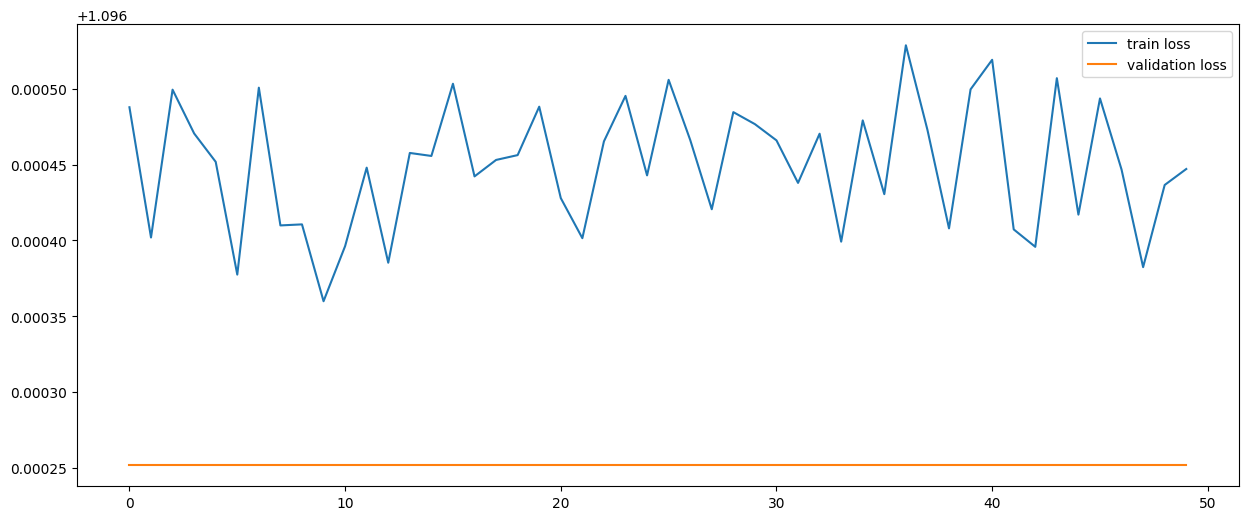

In [52]:
plt.figure(figsize=(15,6))
plt.plot(mlp_train_losses, label='train loss')
plt.plot(mlp_val_losses, label='validation loss')
plt.legend()

In [53]:
state = torch.load('./best_val_model_pytorch.pt')
model = MLP()
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.3548


In [54]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [55]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.35484558389613796
              precision    recall  f1-score   support

           0     0.2766    0.1396    0.1856     49350
           1     0.3658    0.5655    0.4442     66422
           2     0.3698    0.3047    0.3341     67240

    accuracy                         0.3548    183012
   macro avg     0.3374    0.3366    0.3213    183012
weighted avg     0.3432    0.3548    0.3340    183012

